In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [17]:
from pathlib import Path

# In notebooks, use the current working directory
base_dir = Path().resolve()

# Path to images folder (relative to where the notebook file lives)
images_path = base_dir / "images"
beans_path = images_path / "beans"

print("Images directory:", images_path)

Images directory: C:\Users\samue\OneDrive\Documents\Personal Projects\Python\ItemIdentificationGrocery\images


In [18]:
print(beans_path)

C:\Users\samue\OneDrive\Documents\Personal Projects\Python\ItemIdentificationGrocery\images\beans


In [19]:
beans_imgs = list(beans_path.glob("*.jpg")) + list(beans_path.glob("*.png"))
print("Number of Bean images: ", len(beans_imgs))

Number of Bean images:  136


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

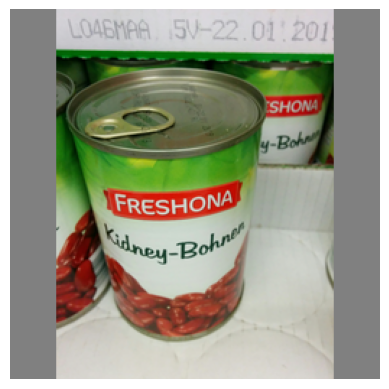

In [20]:
bean1 = mpimg.imread(beans_imgs[0])
plt.imshow(bean1)
plt.axis('off')

# Creating Model

In [21]:
img_height,img_width=256,256
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4947 files belonging to 25 classes.
Using 3958 files for training.


In [22]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4947 files belonging to 25 classes.
Using 989 files for validation.


In [23]:
class_names = train_ds.class_names
print(class_names)

['BEANS', 'CAKE', 'CANDY', 'CEREAL', 'CHIPS', 'CHOCOLATE', 'COFFEE', 'CORN', 'FISH', 'FLOUR', 'HONEY', 'JAM', 'JUICE', 'MILK', 'NUTS', 'OIL', 'PASTA', 'RICE', 'SODA', 'SPICES', 'SUGAR', 'TEA', 'TOMATO_SAUCE', 'VINEGAR', 'WATER']


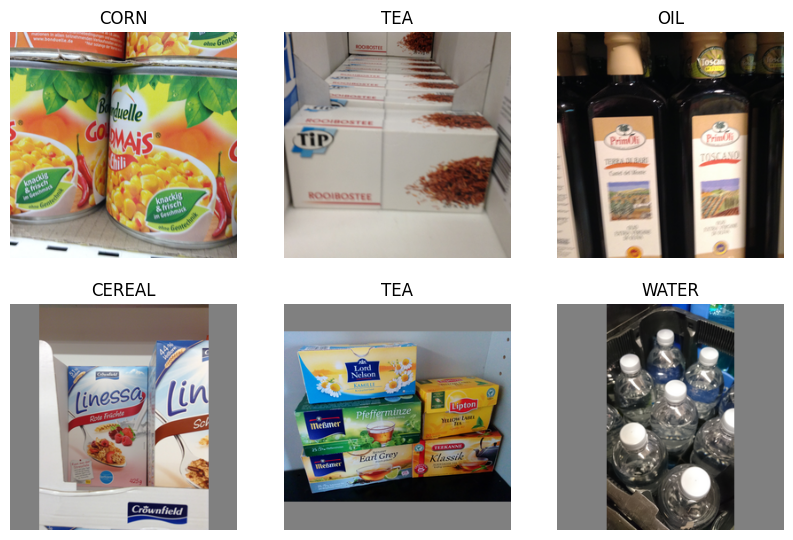

In [24]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training Model

In [25]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(
  include_top=False,
  input_shape=(256,256,3),
  pooling='avg',classes=25,
  weights='imagenet'
)
for layer in pretrained_model.layers:
  layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(25, activation='softmax'))

In [26]:
resnet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │        12,825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,649,625 (94.03 MB)

 Trainable params: 1,061,913 (4.05 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [27]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
epochs=10
history = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.5167 - loss: 1.6820 - val_accuracy: 0.6633 - val_loss: 1.0840
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.7729 - loss: 0.7494 - val_accuracy: 0.7189 - val_loss: 0.8975
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.8631 - loss: 0.4576 - val_accuracy: 0.7503 - val_loss: 0.7862
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.9207 - loss: 0.2851 - val_accuracy: 0.7796 - val_loss: 0.7156
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.9618 - loss: 0.1652 - val_accuracy: 0.7877 - val_loss: 0.7162
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.9846 - loss: 0.0988 - val_accuracy: 0.8059 - val_loss: 0.7165
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.9957 - loss: 0.0509 - val_accuracy: 0.8018 - val_loss: 0.6894
Epoch 8/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9995 - loss: 0.0308 - val_accu

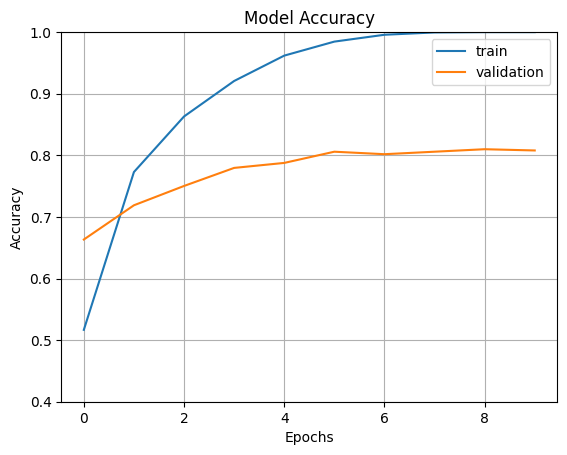

In [29]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

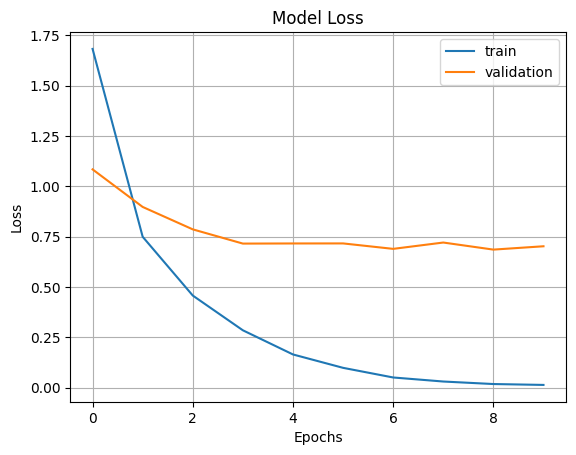

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()